# Group 10 - Project 1

# Members: Bryan Groves, Randy Lam, Zach Wood, Marti Reisinger

# Topic: Drivers in revenue for top 1000 movies

## Overview: We intend to utilize a dataset from Kaggle that outlines the top 1000 movies by their ranking. We intend to analyze the studio, runtime, and performance by date  from both revenue and number of movies that fall within these categories.

In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import datetime

In [ ]:
#Load CSV
movie_df = pd.read_csv("Resources/movies.csv")

movie_df.head()

In [ ]:
cleaned_columns = movie_df.drop(columns = ["Movie Info","Unnamed: 0","Genre"])

cleaned_columns.head()

In [ ]:
final_movie_list = cleaned_columns.dropna()

final_movie_list

# Analysis

#### We would like to see how much revenue each studio is generating in total by creating stacked bar chart with revenue by studio

In [ ]:
rev_total_columns = final_movie_list.drop(columns = ["Movie Runtime","Title","License","Release Date","Domestic Sales (in $)","International Sales (in $)"]).set_index('Distributor')

rev_total_columns.head()

In [ ]:
rev_totals = rev_total_columns.groupby('Distributor').sum()

rev_totals.head()

In [ ]:
x_axis = np.arange(len(rev_totals))
tick_locations = [value for value in x_axis]

In [ ]:
plot_pandas= rev_totals.sort_values(by="World Sales (in $)", ascending=False).plot.bar(color='b')
plt.xlabel("Distributor")
plt.ylabel("World Sales (in $)")
plt.title("World Sales Revenue by Distributor")

In [ ]:
plt.savefig("Images/totalrev.png")
plt.show()

#### Per studio, what is their average revenue for movies that fall within the top 1000 list

In [ ]:
average_sales = rev_total_columns.groupby('Distributor').mean()

average_sales

In [ ]:
plot_pandas=average_sales.sort_values(by="World Sales (in $)", ascending=False).plot.bar(color='b')
plt.xlabel("Distributor")
plt.ylabel("Average World Sales (in $)")
plt.title("Average World Sales Revenue by Distributor")

#### Is there a better time of year for movie successes? We would like to look at the top 1000 movies and understand if summer blockbusters (June-Aug) fair better than holiday movies (Nov-Jan)

In [2]:
#importing new csv file
shortlist_df = pd.read_csv("Resources/Movies 3.csv")
pd.set_option('display.max_rows', None)
print(shortlist_df)

     Ranking                                              Title Release Date  \
0          0  Star Wars: Episode VII - The Force Awakens (2015)   12/16/2015   
1          2                                      Avatar (2009)   12/16/2009   
2          6                                     Titanic (1997)   12/19/1997   
3          7                              Jurassic World (2015)    6/10/2015   
4          9     Star Wars: Episode VIII - The Last Jedi (2017)   12/13/2017   
5         11                               The Lion King (2019)    7/11/2019   
6         12                             The Dark Knight (2008)    7/16/2008   
7         13                Rogue One: A Star Wars Story (2016)   12/14/2016   
8         14  Star Wars: Episode IX - The Rise of Skywalker ...   12/18/2019   
9         17                                   Frozen II (2019)   11/20/2019   
10        21                       The Dark Knight Rises (2012)    7/19/2012   
11        23                  E.T. the E

In [3]:
shortlist_df['Release Date']=pd.to_datetime(shortlist_df['Release Date']).dt.month
print(shortlist_df)

     Ranking                                              Title  Release Date  \
0          0  Star Wars: Episode VII - The Force Awakens (2015)            12   
1          2                                      Avatar (2009)            12   
2          6                                     Titanic (1997)            12   
3          7                              Jurassic World (2015)             6   
4          9     Star Wars: Episode VIII - The Last Jedi (2017)            12   
5         11                               The Lion King (2019)             7   
6         12                             The Dark Knight (2008)             7   
7         13                Rogue One: A Star Wars Story (2016)            12   
8         14  Star Wars: Episode IX - The Rise of Skywalker ...            12   
9         17                                   Frozen II (2019)            11   
10        21                       The Dark Knight Rises (2012)             7   
11        23                

In [4]:
grouped=shortlist_df.groupby(['Release Date'], as_index=False).sum()
grouped.dtypes

Release Date    int64
Ranking         int64
World Sales     int64
dtype: object

In [5]:
grouped.set_index('Release Date').groupby("Release Date").sum()

,Ranking,World Sales
Release Date,,
1,10784,5287296730
6,49462,53318848335
7,44258,40063199122
8,27942,12804437681
11,38236,34871622684
12,53960,44607288309


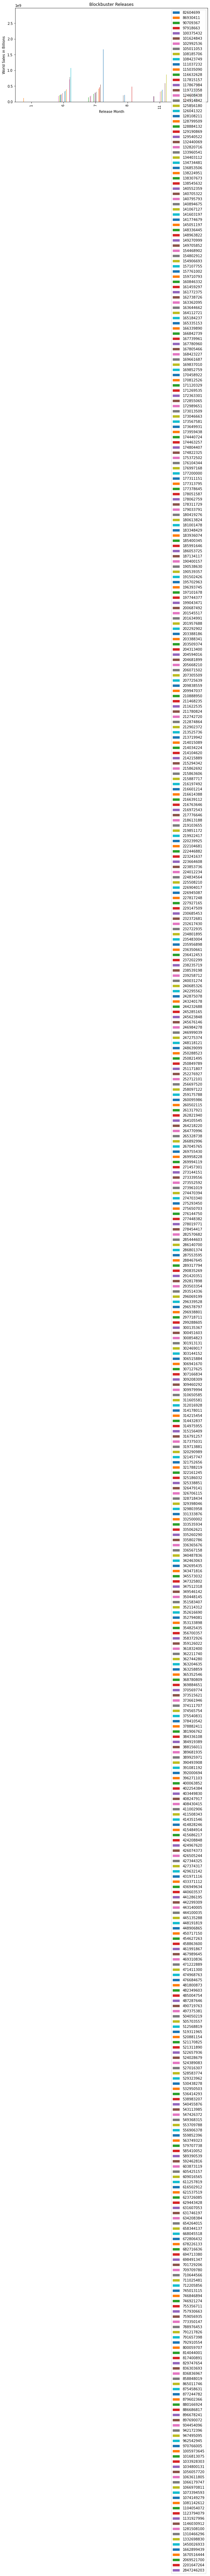

In [6]:
plt.rcParams["figure.figsize"] = (10,5)
shortlist_df.drop(columns=["Ranking"])
shortlist_df.pivot(index='Release Date', columns='World Sales', values='World Sales').plot(kind='bar')

plt.xlabel('Release Month')
plt.ylabel('World Sales in Billions')
plt.title('Blockbuster Releases')
plt.legend(loc='upper right')
plt.show()


#### We would like to measure the total revenue by year for movies that are in the top 1000 list

In [ ]:
movieslist = pd.read_csv("Resources/Movies 3.csv")
pd.set_option('display.max_rows', None)
print(movieslist)

In [ ]:
movieslist['Release Date']=pd.to_datetime(movieslist['Release Date']).dt.year
print(movieslist)

In [ ]:
years=movieslist.groupby(['Release Date'], as_index=False).sum()
print(years)

In [ ]:
movieslist.set_index('Release Date').groupby("Release Date").sum()

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
movieslist.pivot(index='Release Date', columns='World Sales', values='World Sales').plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('World Sales in Billions')
plt.title('Release By Year')
plt.legend(loc='upper right')
plt.show()

#### Create chart based on revenue by market

#### Provide analysis of total counts and revenue by rating

In [ ]:
G_data["Title"].nunique()

In [ ]:
PG_data["Title"].nunique()


In [ ]:
PG13_data["Title"].nunique()

In [ ]:
R_data["Title"].nunique()

In [ ]:
G = 14
PG = 173
PG13 = 363
R = 194

In [ ]:
license_df = pd.DataFrame({
    "G Rating":G,
    "PG Rating":PG,
    "PG-13 Rating":PG13,
    "R Rating":R,}, index=[0])


In [ ]:
license_df[["G Rating","PG Rating","PG-13 Rating","R Rating"]]
license_df

In [ ]:
License_Chart = license_df.plot.bar(color=['blue', 'red', 'green', 'cyan'], align= "center")

plt.ylabel("Movie Count")
plt.xlabel("Movie Rating")

plt.show()



# Hypothesis Test

#### Research Hypothesis: In our sample of top U.S. films, we believe that films with shorter runtime will earn more on average than those with a longer runtime.

#### Null Hypothesis: There is no difference in earnings in films based on runtime.

In [ ]:
#Zach Hypothesis

In [ ]:
hypoth_df = final_movie_list

In [ ]:
hypoth_df["Movie Runtime"] = hypoth_df["Movie Runtime"].str.replace(" hr", "*60").str.replace(" ", " + ").str.replace("min", "0").apply(eval)

In [ ]:
hypoth_df

In [ ]:
hypoth_rev_list = hypoth_df["World Sales (in $)"].tolist()
hypoth_time_list = hypoth_df["Movie Runtime"].tolist()

In [ ]:
print(hypoth_df["Movie Runtime"].median())
print(hypoth_df["Movie Runtime"].mean())
print(hypoth_df["Movie Runtime"].min())
print(hypoth_df["Movie Runtime"].max())

In [ ]:
hypoth_time_series = hypoth_df["Movie Runtime"] 

hypoth_quartiles = hypoth_time_series.quantile([.25, .5, .75])
hypoth_lower = hypoth_quartiles[.25]
hypoth_upper = hypoth_quartiles[.75]
hypoth_iqr = hypoth_upper - hypoth_lower

print(hypoth_lower)
print(hypoth_upper)

In [ ]:
plt.hist(hypoth_time_list, bins = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210], rwidth = .95)

plt.title("Distribution of Films by Runtime")
plt.xlabel("Film Runtime in Minutes")
plt.ylabel("Count")

plt.show()

In [ ]:
hypoth_s_df = hypoth_df.loc[hypoth_df["Movie Runtime"] <= 101]
hypoth_l_df = hypoth_df.loc[hypoth_df["Movie Runtime"] >= 130]

hypoth_m_df = hypoth_df.loc[(hypoth_df["Movie Runtime"] > 101) & (hypoth_df["Movie Runtime"] < 130)]

In [ ]:
hypoth_s_series = hypoth_s_df["World Sales (in $)"].squeeze()
hypoth_l_series = hypoth_l_df["World Sales (in $)"].squeeze()
hypoth_m_series = hypoth_m_df["World Sales (in $)"].squeeze()

hypoth_s_timelist = hypoth_s_df["Movie Runtime"].to_list()
hypoth_l_timelist = hypoth_l_df["Movie Runtime"].to_list()
hypoth_m_timelist = hypoth_m_df["Movie Runtime"].to_list()

In [ ]:
stats.ttest_ind(hypoth_s_series, hypoth_l_series, alternative = "greater")

In [ ]:
print(hypoth_s_series.mean())
print(hypoth_l_series.mean())

In [ ]:
plt.scatter(hypoth_s_timelist, hypoth_s_series, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.scatter(hypoth_l_timelist, hypoth_l_series, marker = "o", facecolors = "lightgreen", edgecolors = "black")
plt.scatter(hypoth_m_timelist, hypoth_m_series, marker = "o", facecolors = "orange", edgecolors = "black")

plt.title("Total Film Sales by Runtime")
plt.xlabel("Film Runtime in Minutes")
plt.ylabel("World Sales in Billions of Dollars")

plt.legend(["Short Films", "Long Films", "Medium Films"])

plt.show()

In [ ]:
hypoth_s_earnlist = hypoth_s_df["World Sales (in $)"].to_list()
hypoth_l_earnlist = hypoth_l_df["World Sales (in $)"].to_list()

In [ ]:
hypoth_earndict = {"Short Films": hypoth_s_earnlist, "Long Films": hypoth_l_earnlist}
hypoth_boxid = [1, 2]

In [ ]:
plt.boxplot(hypoth_earndict.values())

plt.title("Distribution of Earnings, Short vs. Long Films")
plt.ylabel("World Sales in Billions of Dollars")
plt.xticks(hypoth_boxid, hypoth_earndict.keys())

plt.show()

In [ ]:
hypoth_s_dfdis = hypoth_s_df.sort_values(by = ["World Sales (in $)"], ascending = False)

hypoth_s_dfdis.head(5)

In [ ]:
hypoth_l_dfdis = hypoth_l_df.sort_values(by = ["World Sales (in $)"], ascending = False)

hypoth_l_dfdis.head(5)

In [ ]:
final_movie_list["Domestic Sales (in $)"] = final_movie_list['Domestic Sales (in $)'].map("${:,.2f}".format)
final_movie_list["International Sales (in $)"] = final_movie_list['International Sales (in $)'].map("${:,.2f}".format)
final_movie_list["World Sales (in $)"] = final_movie_list['World Sales (in $)'].map("${:,.2f}".format)

final_movie_list